In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform

system = platform.system()
if system == "Linux":
    plt.rcParams['font.sans-serif'] = ["Noto Sans CJK JP"]
elif system == "Darwin":
    plt.rcParams['font.sans-serif'] = ["Kaiti SC"]
plt.rcParams['axes.unicode_minus'] = False

sns.set_style()

In [3]:
data = pd.read_csv("titanic_features_table.csv")
data.head()

,年龄,兄弟姐妹/配偶的个数,父母/小孩个数,票价,1等舱,2等舱,3等舱,登船港口为空,登船为S港,登船为Q港,登船为nan港,女性,男性,index,是否生还
0,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1
2,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2,1
3,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3,1
4,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,4,0


In [4]:
data.columns

Index(['年龄', '兄弟姐妹/配偶的个数', '父母/小孩个数', '票价', '1等舱', '2等舱', '3等舱', '登船港口为空',
       '登船为S港', '登船为Q港', '登船为nan港', '女性', '男性', 'index', '是否生还'],
      dtype='object')

In [5]:
x = data[['年龄', '兄弟姐妹/配偶的个数', '父母/小孩个数', '票价', '1等舱', '2等舱', '3等舱', '登船港口为空',
       '登船为S港', '登船为Q港', '登船为nan港', '女性', '男性']]
y = data['是否生还']
x.shape,y.shape

((1309, 13), (1309,))

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3)


In [7]:
class_weight_parameter={}
for yt in y_train:
    if yt in class_weight_parameter:
        class_weight_parameter[yt]+=1 
    else:
        class_weight_parameter.update({yt:1})
class_weight_parameter

{0: 584, 1: 332}

##### ‘poly’多项式, ‘rbf’ 拉普拉斯RBF核，RBF核也是一种高斯核，它对高维数据进行投影，然后寻找其线性分离。, ‘sigmoid’, ‘precomputed’

In [ ]:
clf = svm.SVC(C=1.0
            ,kernel='poly' # ‘poly’多项式, ‘rbf’ 拉普拉斯RBF核，RBF核也是一种高斯核，它对高维数据进行投影，然后寻找其线性分离。, ‘sigmoid’, ‘precomputed’
            ,degree = 3 #多项式核函数的次数
            ,gamma="auto"#1/x.shape[-1]
            ,cache_size = 400 #指定内核缓存的大小（以MB为单位）
            ,tol=1e-3
            ,class_weight=class_weight_parameter
            ,coef0 =0.0 #浮点数，默认=0.0 核函数中的独立项。它只在' poly '和' sigmoid '中有意义。
            # ,probability=True
            ,max_iter=-1)

clf.fit(x_train, y_train)
prediction_y_svc = clf.predict(x_test)
accuracy_score(y_test,prediction_y_svc)

### 第二种方法实现非线性支持向量机

In [27]:
clf = svm.NuSVC(nu=0.5 #边界误差分数的上限(参见用户指南)和支持向量分数的下限。区间限定在(0,1)内。
                , kernel='rbf'
                , degree=3
                , gamma='scale'
                , coef0=0.0
                , shrinking=True
                , probability=False
                , tol=0.001
                , cache_size=200
                , class_weight=class_weight_parameter
                , verbose=False
                , max_iter=-1
                , decision_function_shape='ovr'
                , break_ties=False
                , random_state=None)
clf.fit(x_train,y_train)
prediction_y_Lsvc = clf.predict(x_test)
accuracy_score(y_test,prediction_y_Lsvc)


0.8371501272264631

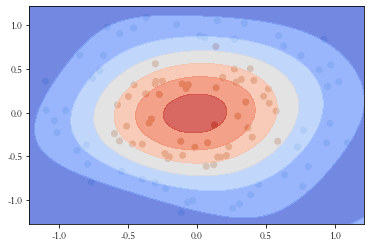

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm

# 创建一些具有非线性特征的数据
X, y = datasets.make_circles(n_samples=100, factor=0.5, noise=0.1)

# 创建非线性SVM模型
clf = svm.SVC(kernel='rbf')
clf.fit(X, y)

# 绘制数据点
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# 绘制决策边界
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 创建网格来评估模型
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制决策边界和间隔
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.show()